# Importing modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv('KosteckiDillon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4152 non-null   int64  
 1   id          4152 non-null   int64  
 2   time        4152 non-null   int64  
 3   dos         4152 non-null   int64  
 4   hatype      4152 non-null   object 
 5   age         4152 non-null   int64  
 6   airq        4152 non-null   float64
 7   medication  4152 non-null   object 
 8   headache    4152 non-null   object 
 9   sex         4152 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 324.5+ KB


In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
df['medication'].value_counts()

continuing    2386
reduced        981
none           785
Name: medication, dtype: int64

In [50]:

fig = px.pie(df, values='medication', names='age',title='pie chart between age and medication')
fig.show()

In [57]:
fig = px.bar(df, x='age', y='medication',color='age',title='graph between age and medication')
fig.show()

In [7]:
df_headache_yes = df[df['headache'] == 'yes']['age']
df_headache_no = df[df['headache'] == 'no']['age']

In [8]:
print(df_headache_yes)

0       30
1       30
2       30
3       30
4       30
        ..
4143    26
4144    26
4146    26
4147    26
4151    26
Name: age, Length: 2666, dtype: int64


In [9]:
print(df_headache_no)

12      30
22      36
47      36
66      28
68      28
        ..
4108    43
4145    26
4148    26
4149    26
4150    26
Name: age, Length: 1486, dtype: int64


In [10]:
df.hatype.unique()

array(['Aura', 'No Aura', 'Mixed'], dtype=object)

In [11]:
df.medication.unique()

array(['continuing', 'reduced', 'none'], dtype=object)

In [12]:
df.headache.unique()

array(['yes', 'no'], dtype=object)

In [13]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [14]:
df[df.isnull().any(axis=1)]

,id,time,dos,hatype,age,airq,medication,headache,sex


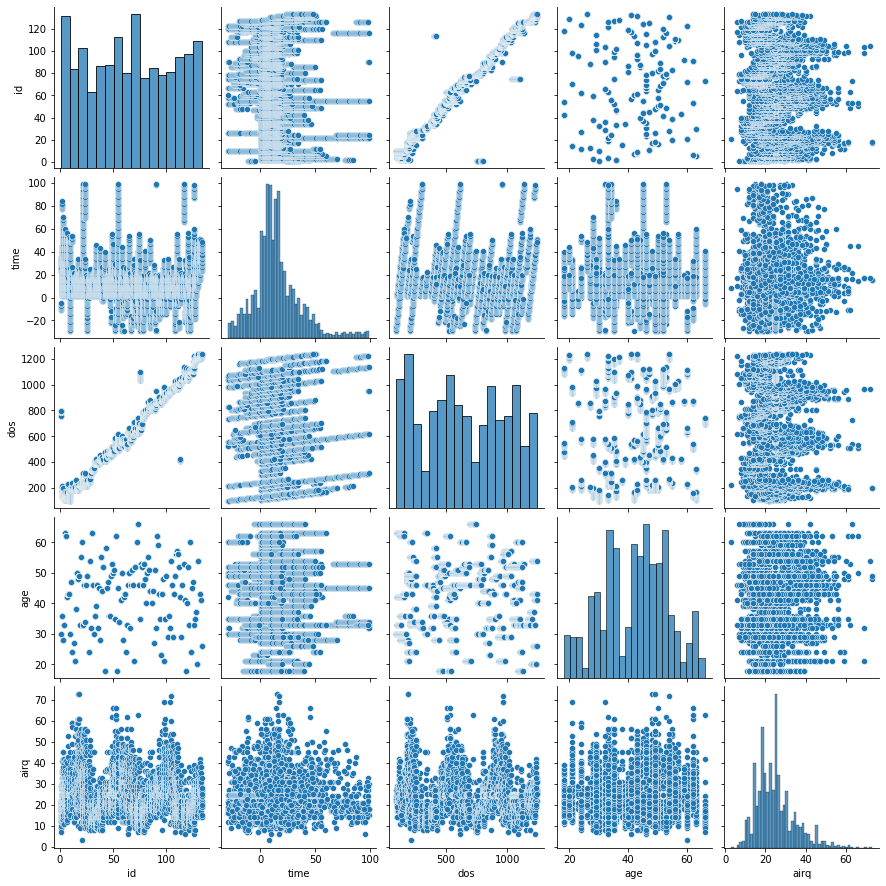

In [15]:
sns.pairplot(df[['id', 'time', 'dos', 'hatype', 'age', 'airq', 'medication', 'headache','sex']])

In [16]:
df.corr()

,id,time,dos,age,airq
id,1.000000,-0.137080,0.971239,0.057145,-0.102202
time,-0.137080,1.000000,-0.085977,-0.055781,-0.002529
dos,0.971239,-0.085977,1.000000,0.021148,-0.129934
age,0.057145,-0.055781,0.021148,1.000000,-0.009163
airq,-0.102202,-0.002529,-0.129934,-0.009163,1.000000


In [17]:
df.columns

Index(['id', 'time', 'dos', 'hatype', 'age', 'airq', 'medication', 'headache',
       'sex'],
      dtype='object')

In [18]:
df.dtypes

id              int64
time            int64
dos             int64
hatype         object
age             int64
airq          float64
medication     object
headache       object
sex            object
dtype: object

In [19]:
sex=df.sex.replace(to_replace=['female', 'male'], value=[0,1])
sex


0       0
1       0
2       0
3       0
4       0
       ..
4147    1
4148    1
4149    1
4150    1
4151    1
Name: sex, Length: 4152, dtype: int64

In [20]:
df['sex']=pd.Series(sex)

In [21]:
df.dtypes

id              int64
time            int64
dos             int64
hatype         object
age             int64
airq          float64
medication     object
headache       object
sex             int64
dtype: object

In [22]:
df.headache.unique()

array(['yes', 'no'], dtype=object)

In [23]:
headache=df.headache.replace(to_replace=['no', 'yes'], value=[0,1])

In [24]:
df['headache']=pd.Series(headache)

In [25]:
df

,id,time,dos,hatype,age,airq,medication,headache,sex
0,1,-11,753,Aura,30,9.0,continuing,1,0
1,1,-10,754,Aura,30,7.0,continuing,1,0
2,1,-9,755,Aura,30,10.0,continuing,1,0
3,1,-8,756,Aura,30,13.0,continuing,1,0
4,1,-7,757,Aura,30,18.0,continuing,1,0
...,...,...,...,...,...,...,...,...,...
4147,133,44,1232,Aura,26,20.0,continuing,1,1
4148,133,45,1233,Aura,26,27.0,continuing,0,1
4149,133,46,1234,Aura,26,28.0,continuing,0,1
4150,133,47,1235,Aura,26,33.0,continuing,0,1


In [26]:
df.medication.unique()

array(['continuing', 'reduced', 'none'], dtype=object)

In [27]:
medication=df.medication.replace(to_replace=['none','reduced','continuing'],value=[0,1,2])

In [28]:
df['medication']=pd.Series(medication)

In [29]:
df

,id,time,dos,hatype,age,airq,medication,headache,sex
0,1,-11,753,Aura,30,9.0,2,1,0
1,1,-10,754,Aura,30,7.0,2,1,0
2,1,-9,755,Aura,30,10.0,2,1,0
3,1,-8,756,Aura,30,13.0,2,1,0
4,1,-7,757,Aura,30,18.0,2,1,0
...,...,...,...,...,...,...,...,...,...
4147,133,44,1232,Aura,26,20.0,2,1,1
4148,133,45,1233,Aura,26,27.0,2,0,1
4149,133,46,1234,Aura,26,28.0,2,0,1
4150,133,47,1235,Aura,26,33.0,2,0,1


In [30]:
len(df.hatype.unique())

3

In [31]:
hatype=df.hatype.replace(to_replace=['Aura','No Aura','Mixed'],value=[1,0,2])

In [32]:
df['hatype']=pd.Series(hatype)

In [33]:
df_final=df
df_final

,id,time,dos,hatype,age,airq,medication,headache,sex
0,1,-11,753,1,30,9.0,2,1,0
1,1,-10,754,1,30,7.0,2,1,0
2,1,-9,755,1,30,10.0,2,1,0
3,1,-8,756,1,30,13.0,2,1,0
4,1,-7,757,1,30,18.0,2,1,0
...,...,...,...,...,...,...,...,...,...
4147,133,44,1232,1,26,20.0,2,1,1
4148,133,45,1233,1,26,27.0,2,0,1
4149,133,46,1234,1,26,28.0,2,0,1
4150,133,47,1235,1,26,33.0,2,0,1


In [34]:
df_final.corr()

,id,time,dos,hatype,age,airq,medication,headache,sex
id,1.000000,-0.137080,0.971239,0.107066,0.057145,-0.102202,0.000987,-0.019063,0.176734
time,-0.137080,1.000000,-0.085977,0.122126,-0.055781,-0.002529,-0.190634,-0.038022,0.169886
dos,0.971239,-0.085977,1.000000,0.145901,0.021148,-0.129934,0.013337,-0.005127,0.168754
hatype,0.107066,0.122126,0.145901,1.000000,-0.151747,-0.120952,-0.056966,0.124049,0.066247
age,0.057145,-0.055781,0.021148,-0.151747,1.000000,-0.009163,-0.039558,-0.058954,0.085890
airq,-0.102202,-0.002529,-0.129934,-0.120952,-0.009163,1.000000,-0.050362,0.014357,-0.015205
medication,0.000987,-0.190634,0.013337,-0.056966,-0.039558,-0.050362,1.000000,0.120437,-0.171292
headache,-0.019063,-0.038022,-0.005127,0.124049,-0.058954,0.014357,0.120437,1.000000,-0.003917
sex,0.176734,0.169886,0.168754,0.066247,0.085890,-0.015205,-0.171292,-0.003917,1.000000


In [35]:
df_final['medication'].value_counts()

2    2386
1     981
0     785
Name: medication, dtype: int64

In [36]:
data_majority = df_final[df_final.medication==2]
data_minority2 = df_final[df_final.medication==1]
from sklearn.utils import resample
data_minority_upsampled1 = resample(data_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled1])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['medication'].value_counts()


2    2386
1    2000
Name: medication, dtype: int64

In [37]:
data_majority = df_final[df_final.medication==2]
data_minority2 = df_final[df_final.medication==0]
from sklearn.utils import resample
data_minority_upsampled1 = resample(data_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data=data_upsampled['medication'].value_counts()

In [38]:
data=data_upsampled.copy()


# confussion matrix

<AxesSubplot:>

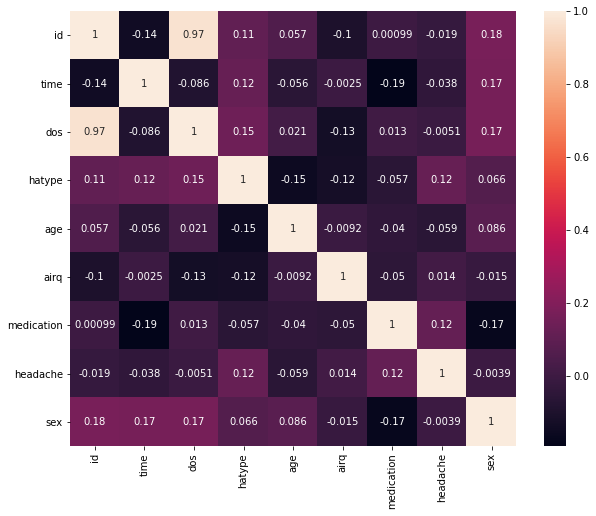

In [39]:
corr = df_final.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score

In [41]:
X=data.drop(['medication'],1)
y=data['medication']

In [42]:
df_final

,id,time,dos,hatype,age,airq,medication,headache,sex
0,1,-11,753,1,30,9.0,2,1,0
1,1,-10,754,1,30,7.0,2,1,0
2,1,-9,755,1,30,10.0,2,1,0
3,1,-8,756,1,30,13.0,2,1,0
4,1,-7,757,1,30,18.0,2,1,0
...,...,...,...,...,...,...,...,...,...
4147,133,44,1232,1,26,20.0,2,1,1
4148,133,45,1233,1,26,27.0,2,0,1
4149,133,46,1234,1,26,28.0,2,0,1
4150,133,47,1235,1,26,33.0,2,0,1


In [43]:
plt.bar(df_final,x='hatype',y='age') 
  
plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show() 

TypeError: bar() got multiple values for argument 'x'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=4)

# adaboost

In [ ]:
X2 = data.drop(['medication'], axis=1)
y2 = data['medication']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2,random_state=4)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train2)

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)

In [ ]:
print("Accuracy:",accuracy_score(y_test2, y_pred2))

In [ ]:
from sklearn.model_selection import cross_val_score  
print(cross_val_score(abc,X2,y2,cv=5,scoring="accuracy").mean())

# KNeighbour

In [ ]:
X3 = data.drop(['medication'], axis=1)
y3 = data['medication']

In [ ]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.2,random_state=4)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train3)

X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [ ]:
clf = KNeighborsRegressor()   
clf.fit(X_train3, y_train3) 
y_pred3 = clf.predict(X_test3)
print(clf.score(X_test3, y_test3))


In [ ]:
#print(cross_val_score(clf,X3,y3,cv=4,scoring="accuracy").mean())

In [ ]:
#from sklearn import metrics
#print(metrics.classification_report(y_test3, y_pred3))

# Randomforest

In [ ]:
X1 = data.drop(['medication'], axis=1)
y1 = data['medication']

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=4)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train1)

X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
clfe = RandomForestClassifier(n_estimators = 50)   
clfe.fit(X_train1, y_train1) 
y_pred1 = clfe.predict(X_test1)
print(clfe.score(X_test1, y_test1))

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cmx = metrics.confusion_matrix(y_test1,y_pred1)
cmx

In [ ]:
print(cross_val_score(clfe,X1,y1,cv=4,scoring="accuracy").mean())

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test1, y_pred1))

# svm 


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


In [ ]:
grid_predictions = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 
